# Save annual data

Save annual-mean data.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
from multiprocessing import Pool

import feather as ft
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman

import config

<ipython-input-2-037f2963101a>:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
ID = config.ID

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [5]:
STITCHED_DIR = "./{}-country-crunch-stitched".format(ID)
STITCHED_NORMALISED_DIR = "./{}-country-crunch-stitched-normalised".format(ID)

STITCHED_DIR = "./{}-country-crunch-stitched-popn-weighted".format(ID)
STITCHED_NORMALISED_DIR = (
    "./{}-country-crunch-stitched-normalised-popn-weighted".format(ID)
)

MAX_WORKERS = 60

<IPython.core.display.Javascript object>

In [6]:
load_dir = STITCHED_DIR
# load_dir = STITCHED_NORMALISED_DIR

<IPython.core.display.Javascript object>

In [7]:
crunched_files = [
    f
    for f in glob.glob(os.path.join(load_dir, "**", "*.nc"), recursive=True)
    if "ssp" in f
]
crunched_files[:2]
crunched_files

['./20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp585_r2i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp370_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_NESM3_ssp585_r2i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp126_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_NESM3_ssp126_r2i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp126_r2i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp370_r2i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_ACCESS-CM2_ssp370_r3i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted

<IPython.core.display.Javascript object>

In [8]:
# [f for f in crunched_files if "CM4" in f]

<IPython.core.display.Javascript object>

In [9]:
dud_files = [
    "{}/netcdf-scm_tas_Amon_MRI-ESM2-0_ssp370-lowNTCF_r1i1p1f1_gn_185001-205512.nc".format(
        load_dir
    )
]
crunched_files = [f for f in crunched_files if f not in dud_files]

<IPython.core.display.Javascript object>

In [10]:
def load_file(f):
    return scmdata.ScmRun.from_nc(f)


all_dat = []
with Pool(MAX_WORKERS) as pool:
    all_dat = pool.map(load_file, crunched_files)

all_dat = scmdata.run_append(
    [scmdata.ScmRun(s.timeseries(time_axis="year-month")) for s in tqdman.tqdm(all_dat)]
)

  0%|          | 0/13 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [11]:
cms = all_dat.get_unique_meta("climate_model")
display(len(cms))
sorted(cms)

3

['ACCESS-CM2', 'IITM-ESM', 'NESM3']

<IPython.core.display.Javascript object>

In [12]:
all_dat_annual_mean = all_dat.time_mean("AC")
all_dat_annual_mean

<scmdata.ScmRun (timeseries: 5885, timepoints: 251)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2100-07-01T00:00:00
Meta:
	      activity_id climate_model grid member_id mip_era        model  \
	0     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	1     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	2     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	3     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	4     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	...           ...           ...  ...       ...     ...          ...   
	5880  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5881  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5882  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5883  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5884  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	
	              

<IPython.core.display.Javascript object>

In [13]:
out = all_dat_annual_mean.timeseries(time_axis="year").reset_index()
out

time,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World,ssp585,K,tas,...,292.400356,292.554316,292.661771,292.519080,292.821443,292.887192,292.974665,293.032758,293.013119,293.268032
1,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Afghanistan,ssp585,K,tas,...,291.165714,291.711486,291.652242,291.404620,290.972839,291.749132,292.251117,290.888283,291.429854,291.952118
2,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Albania,ssp585,K,tas,...,293.228205,293.397459,294.172791,293.039305,294.494183,293.081498,294.158731,293.733525,294.146406,294.920557
3,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Algeria,ssp585,K,tas,...,300.357064,301.283970,301.777081,300.947807,302.392287,301.615577,301.720693,301.763933,301.572400,302.167989
4,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|American Samoa,ssp585,K,tas,...,304.421814,303.952596,304.580790,304.789653,304.566243,304.688822,304.632284,305.144450,304.541178,304.685872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|W. Sahara,ssp126,K,tas,...,294.204646,294.149256,294.092104,293.964609,294.490460,294.061028,294.220586,293.860806,294.023814,294.333081
5881,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Yemen,ssp126,K,tas,...,301.746765,302.273122,302.071260,302.426126,302.111910,301.998838,302.723068,301.953763,302.344757,301.815587
5882,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zambia,ssp126,K,tas,...,294.229600,294.687722,294.754730,294.279920,293.587473,293.848781,294.522583,293.997396,294.270641,293.918856
5883,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,...,294.026114,293.779108,294.694184,293.695212,293.191334,293.421013,294.493261,293.896117,293.880134,293.575456


<IPython.core.display.Javascript object>

In [14]:
out_file_name = "{}-regional_means.feather".format(ID)
ft.write_dataframe(out, out_file_name)
!du -sh {out_file_name}

7.3M	20210416-regional_means.feather


<IPython.core.display.Javascript object>

In [15]:
del all_dat_annual_mean

<IPython.core.display.Javascript object>

## How to work with the data

In [16]:
all_dat_annual_mean_loaded = scmdata.ScmRun(pd.read_feather(out_file_name))
all_dat_annual_mean_loaded

<scmdata.ScmRun (timeseries: 5885, timepoints: 251)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      activity_id climate_model grid member_id mip_era        model  \
	0     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	1     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	2     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	3     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	4     ScenarioMIP    ACCESS-CM2   gn  r2i1p1f1   CMIP6  unspecified   
	...           ...           ...  ...       ...     ...          ...   
	5880  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5881  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5882  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5883  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	5884  ScenarioMIP         NESM3   gn  r1i1p1f1   CMIP6  unspecified   
	
	              

<IPython.core.display.Javascript object>

In [37]:
sorted(all_dat_annual_mean_loaded["region"].unique())

['Nearest World',
 'Nearest World|Natural Earth 50m|Afghanistan',
 'Nearest World|Natural Earth 50m|Albania',
 'Nearest World|Natural Earth 50m|Algeria',
 'Nearest World|Natural Earth 50m|American Samoa',
 'Nearest World|Natural Earth 50m|Andorra',
 'Nearest World|Natural Earth 50m|Angola',
 'Nearest World|Natural Earth 50m|Anguilla',
 'Nearest World|Natural Earth 50m|Antarctica',
 'Nearest World|Natural Earth 50m|Antigua and Barb.',
 'Nearest World|Natural Earth 50m|Argentina',
 'Nearest World|Natural Earth 50m|Armenia',
 'Nearest World|Natural Earth 50m|Aruba',
 'Nearest World|Natural Earth 50m|Ashmore and Cartier Is.',
 'Nearest World|Natural Earth 50m|Australia',
 'Nearest World|Natural Earth 50m|Austria',
 'Nearest World|Natural Earth 50m|Azerbaijan',
 'Nearest World|Natural Earth 50m|Bahamas',
 'Nearest World|Natural Earth 50m|Bahrain',
 'Nearest World|Natural Earth 50m|Bangladesh',
 'Nearest World|Natural Earth 50m|Barbados',
 'Nearest World|Natural Earth 50m|Belarus',
 'Nearest

<IPython.core.display.Javascript object>

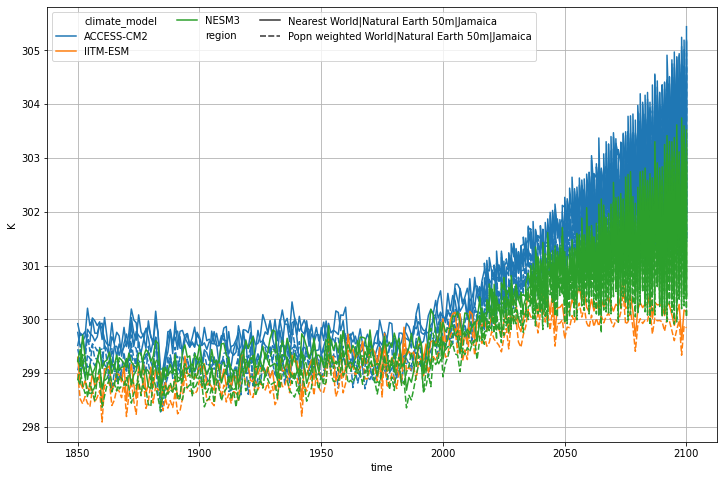

<IPython.core.display.Javascript object>

In [39]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World|*Jamaica")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(scenario="ssp245")
    #     .filter(climate_model="TaiESM1")
    .lineplot(
        style="region",
        hue="climate_model",
        hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()

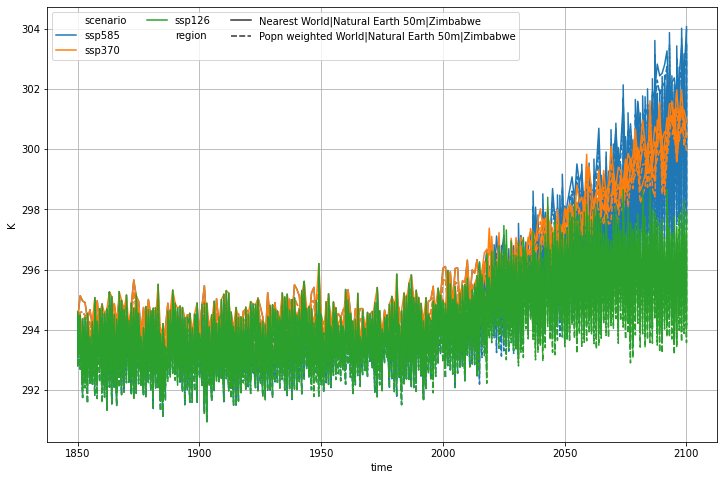

<IPython.core.display.Javascript object>

In [41]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World*Zimbabwe*")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(climate_model="MIROC6")
    .lineplot(
        hue="scenario",
        style="region",
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

In [42]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat_annual_mean_loaded.filter(year=mean_years)
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean
0,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World,ssp585,K,tas,air_temperature,292.465314
1,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Afghanistan,ssp585,K,tas,air_temperature,290.936578
2,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Albania,ssp585,K,tas,air_temperature,293.472933
3,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Algeria,ssp585,K,tas,air_temperature,301.106047
4,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|American Samoa,ssp585,K,tas,air_temperature,304.199232
...,...,...,...,...,...,...,...,...,...,...,...,...
5880,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|W. Sahara,ssp126,K,tas,air_temperature,294.243932
5881,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Yemen,ssp126,K,tas,air_temperature,302.299809
5882,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zambia,ssp126,K,tas,air_temperature,294.446757
5883,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature,294.147109


<IPython.core.display.Javascript object>

In [43]:
tmp = bardf[bardf["region"] == "Nearest World"][
    ["scenario", "climate_model"]
].drop_duplicates()
display(tmp["scenario"].value_counts())
tmp

ssp126    3
ssp585    2
ssp370    1
Name: scenario, dtype: int64

,scenario,climate_model
0,ssp585,ACCESS-CM2
453,ssp370,ACCESS-CM2
906,ssp585,NESM3
1358,ssp126,ACCESS-CM2
1811,ssp126,NESM3
4074,ssp126,IITM-ESM


<IPython.core.display.Javascript object>

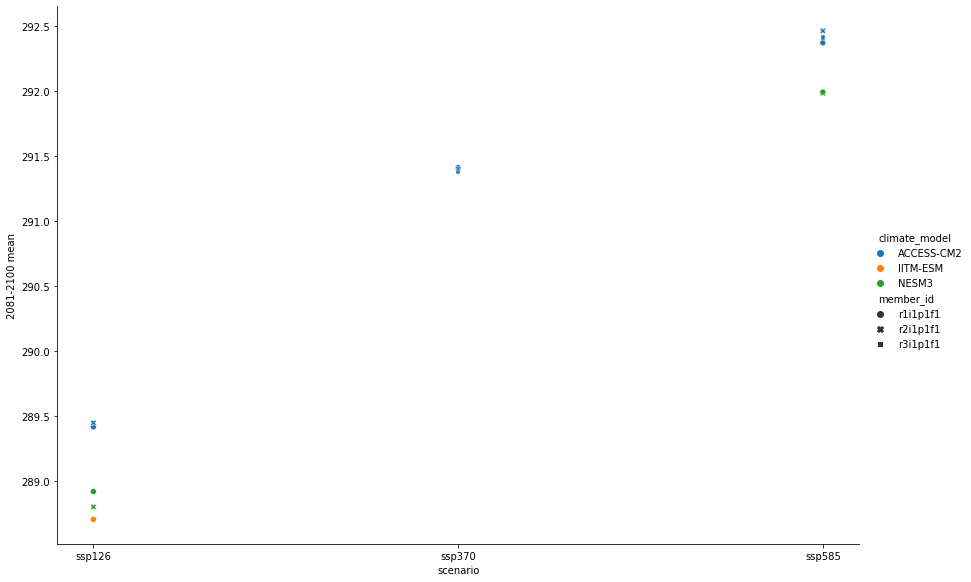

<IPython.core.display.Javascript object>

In [44]:
sns.relplot(
    data=bardf[bardf["region"] == "Nearest World"].sort_values(by="scenario"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="member_id",
    style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)

In [45]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf["Population weighted"] = bardf["region"].str.contains("Popn weighted")
bardf["region"] = bardf["region"].str.replace("Popn weighted ", "")
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean,Population weighted
0,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World,ssp585,K,tas,air_temperature,292.465314,False
1,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Afghanistan,ssp585,K,tas,air_temperature,290.936578,False
2,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Albania,ssp585,K,tas,air_temperature,293.472933,False
3,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Algeria,ssp585,K,tas,air_temperature,301.106047,False
4,ScenarioMIP,ACCESS-CM2,gn,r2i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|American Samoa,ssp585,K,tas,air_temperature,304.199232,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|W. Sahara,ssp126,K,tas,air_temperature,294.243932,True
5881,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Yemen,ssp126,K,tas,air_temperature,302.299809,True
5882,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zambia,ssp126,K,tas,air_temperature,294.446757,True
5883,ScenarioMIP,NESM3,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature,294.147109,True


<IPython.core.display.Javascript object>

done


<ipython-input-46-6497382ecafc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)


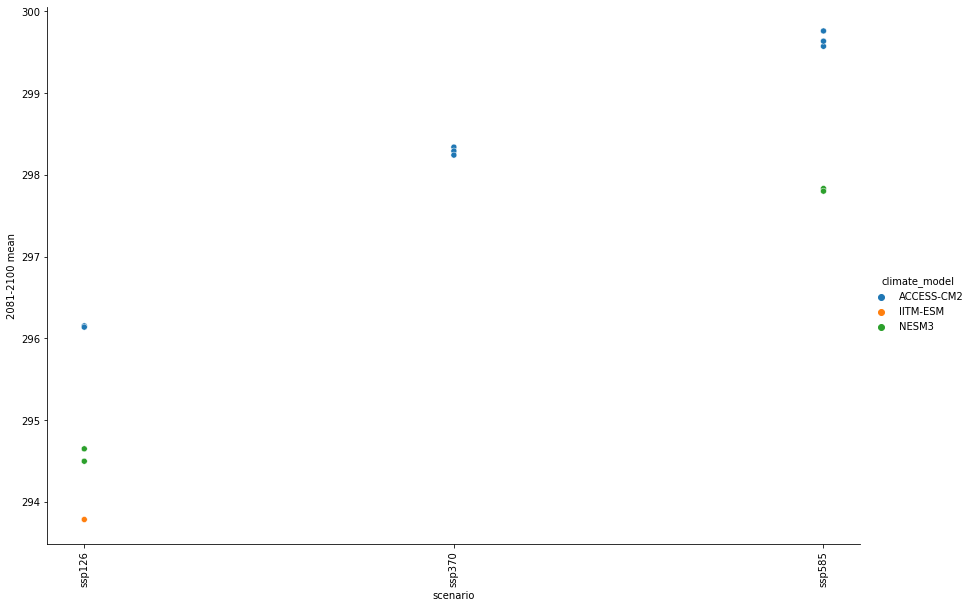

<IPython.core.display.Javascript object>

In [46]:
fg = sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    height=8,
    aspect=1.5,
)
fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)
print("done")